In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [32]:
t=np.array([0,45,90,
135,
180,
270,
315,
360,
405,
450,
495,
540,
585,
630,
675,
720,
765,
810,
855,
900,
945,
990,
1035,
1080,
1125,
1170,
1215,
1260,
1305,
1350,
1395,
1440,
1485,
1530,
1575,
1620,
1665,
1710,
1755,1800,1845,1890,1935,1980,2025,2070,2115,2160,2205,2250,2295,2340,2385, 2430,2475,2520,2565,2610,2655,2700,2745,2790, 2835,2880,3540, 4200])
theta=np.array([0,
0.001745810056,
0.00405027933,
0.006215083799,
0.007681564246,
0.007960893855,
0.006983240223,
0.005097765363,
0.003631284916,
0.002374301676,
0.002094972067,
0.00251396648,
0.003421787709,
0.004748603352,
0.005656424581,
0.006354748603,
0.006703910615,
0.006284916201,
0.005516759777,
0.004748603352,
0.00405027933,
0.003491620112,
0.003491620112,
0.004189944134,
0.00467877095,
0.00530726257,
0.005656424581,
0.00593575419,
0.005796089385,
0.005237430168,
0.004748603352,
0.004120111732,
0.003701117318,
0.003561452514,
0.003980446927,
0.004469273743,
0.004818435754,
0.005237430168,
0.005516759777,
0.005586592179,
0.005586592179,
0.00530726257,
0.004888268156,
0.004539106145,
0.004259776536,
0.004399441341,
0.004608938547,
0.004748603352,
0.005237430168,
0.005377094972,
0.005237430168,
0.005097765363,
0.004888268156,
0.004818435754,
0.00467877095,
0.00467877095,
0.004608938547,
0.004539106145,
0.00467877095,
0.004888268156,
0.004888268156,
0.004958100559,
0.004958100559,
0.004958100559,
0.005097765363,
0.004608938547])

uncer=(np.sqrt(2)*.002/(2*7.16))*np.ones(len(theta))
uncer2=np.array([0.0006983240223,
0.0007396679262,
0.0008986945902,
0.001114060076,
0.001280098063,
0.001312966765,
0.001199538101,
0.0009972811469,
0.000863058771,
0.000773058362,
0.0007571443782,
0.0007816242857,
0.0008461962037,
0.0009630719617,
0.001054401188,
0.001129324719,
0.001168038875,
0.001121675962,
0.0010398665,
0.0009630719617,
0.0008986945902,
0.0008517424751,
0.0008517424751,
0.0009110988516,
0.0009563816853,
0.001018376109,
0.001054401188,
0.001083939059,
0.001069094186,
0.001011299287,
0.0009630719617,
0.0009048654145,
0.0008688258813,
0.0008573638198,
0.0008925876772,
0.0009366335378,
0.0009698141708,
0.001011299287,
0.0010398665,
0.001047113641,
0.001047113641,
0.001018376109,
0.000976607237,
0.0009431613427,
0.0009173936252,
0.0009301621885,
0.0009497444391,
0.0009630719617,
0.001011299287,
0.001025496855,
0.001011299287,
0.0009972811469,
0.000976607237,
0.0009698141708,
0.0009563816853,
0.0009563816853,
0.0009497444391,
0.0009431613427,
0.0009563816853,
0.000976607237,
0.000976607237,
0.0009834501064,
0.0009834501064,
0.0009834501064,
0.0009972811469,
0.0009497444391])

<ErrorbarContainer object of 3 artists>

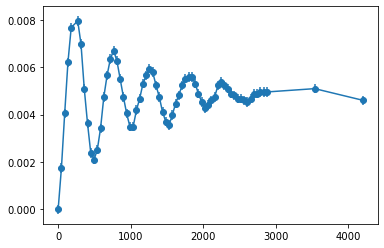

In [33]:

plt.scatter(t,theta)
plt.errorbar(t,theta,yerr=uncer)



In [34]:
def damped_sin(t,w,C,A,g,phi):
    return A*np.exp(-g*t)*np.sin(w*t+phi)+C



In [35]:
popt, pcov = curve_fit(damped_sin, t, theta,p0=(.01,.005,.004,.01,0))



In [36]:
popt



array([ 1.21335184e-02,  4.82474166e-03,  4.71158216e-03,  1.13111970e-03,
       -1.32939789e+00])

Text(0, 0.5, 'Angle (radians)')

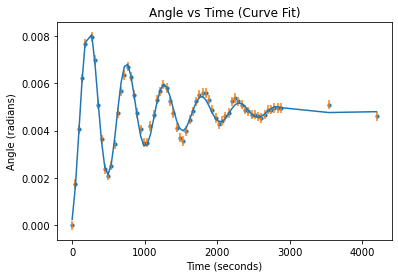

In [37]:
y=damped_sin(t,popt[0],popt[1],popt[2],popt[3],popt[4])
plt.plot(t,y)
plt.scatter(t,theta,s=10)
plt.errorbar(t,theta,yerr=uncer,barsabove=True,linestyle='None')
plt.title('Angle vs Time (Curve Fit)')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (radians)')

In [38]:
2*np.pi/popt[0]

517.8370438690134

In [52]:
ychi=damped_sin(t,2*np.pi/(517.8370438690134+10),popt[1],popt[2],popt[3],popt[4])
chi=np.sum((ychi-theta)**2)/(np.sqrt(2)*.002/(2*7.16))**2
chi/61


1.766305699000992

In [15]:
len(theta)

66

In [30]:
uncer

array([0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752, 0.00019752, 0.00019752, 0.00019752, 0.00019752,
       0.00019752])

In [53]:
4*np.pi**2

39.47841760435743